# OBJECTFS
- Observer l'effet de $\rho$, $\sigma_a$ et $\sigma_c$ sur $E$, $F$, et $T$ 
- Comprendre comment utiliser les reaseaux de neuronnes pour retrouver les tendances observees

# SETUP

## Les imports

In [364]:
%reset -f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

## Chargement des donnees

In [365]:
""" VERSION COLAB """

# # to load data from my personal github repo (update it if we have to)
# import os
# if not os.path.exists("assets"):
#     print("Data wansn't here. Let's download it!")
#     !git clone https://github.com/desmond-rn/assets.git
# else:
#     print("Data already here. Let's update it!")
#     %cd assets
#     # %rm -rf assets
#     !git pull https://github.com/desmond-rn/assets.git
#     %cd ..

# print("\n")
# !ls assets/dataframes/inverse

# df_spatial_path = "assets/dataframes/inverse/df_spatial.csv"
# df_temporal_path = "assets/dataframes/inverse/df_temporal.csv"

' VERSION COLAB '

In [366]:
""" VERSION JUPYTER """

# to load data locally

%ls "../../data"

df_spatial_path = "../../data/df_spatial.csv"
df_temporal_path = "../../data/df_temporal.csv"

Volume in drive C has no label.
 Volume Serial Number is 2248-85E1

 Directory of c:\Users\Roussel\Dropbox\Unistra\SEMESTRE 2\Projet\Inverse\moco-inverse\data

18/05/2020  10:00    <DIR>          .
18/05/2020  10:00    <DIR>          ..
17/05/2020  10:11            61,341 dataframe_1.csv
17/05/2020  10:11            87,844 dataframe_2.csv
16/05/2020  15:20             1,394 df_1.csv
18/05/2020  02:52             5,243 df_1_test.csv
16/05/2020  15:20             1,484 df_2.csv
18/05/2020  02:52            17,916 df_2_test.csv
19/05/2020  08:13           444,334 df_spatial.csv
19/05/2020  08:13           460,378 df_temporal.csv
               8 File(s)      1,079,934 bytes
               2 Dir(s)  100,648,308,736 bytes free


### Donnees spatialles

In [367]:
types = {'x_min':int, 'x_max':int, 'N':int, 'c':int, 'a':int, 'C_v':int, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':float, 'sigma_a_expr':float, 'sigma_c_expr':float, 'E_init_expr':str, 'F_init_expr':str, 'T_init_expr':str, 'dt':float, 'step_count':int, 'x':str, 'rho':str, 'sigma_a':str, 'sigma_c':str, 'E_init':str, 'E_final':str, 'F_init':str, 'F_final':str, 'T_init':str, 'T_final':str}
df_s = pd.read_csv(df_spatial_path, thousands=',', dtype=types)

df_s.head(1)

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,...,x,rho,sigma_a,sigma_c,E_init,E_final,F_init,F_final,T_init,T_final
0,0,1,100,1,1,1,0.99,0.000001,1.0,0.0,...,"[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.21674e-22, 3.70353e-21, 2.52616e-20, 1.6555...","[1.29237e-17, 2.68069e-18, 1.1525e-17, 9.09427...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-1.29237e-17, -2.68069e-18, -1.1525e-17, -9.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [368]:
df_s.dtypes

x_min             int32
x_max             int32
N                 int32
c                 int32
a                 int32
C_v               int32
CFL             float64
epsilon         float64
t_final         float64
rho_expr        float64
sigma_a_expr    float64
sigma_c_expr    float64
E_init_expr      object
F_init_expr      object
T_init_expr      object
dt              float64
time_steps        int64
x                object
rho              object
sigma_a          object
sigma_c          object
E_init           object
E_final          object
F_init           object
F_final          object
T_init           object
T_final          object
dtype: object

### Donnees temporelles

In [369]:
types = {'x_min':int, 'x_max':int, 'N':int, 'c':int, 'a':int, 'C_v':int, 'CFL':float, 'epsilon':float, 't_final':float, 'rho_expr':float, 'sigma_a_expr':float, 'sigma_c_expr':float, 'E_x_0_expr':str, 'F_x_0_expr':str, 'T_x_0_expr':str, 'dt':float, 'step_count':int, 't':str, 'E_left':str, 'E_right':str, 'F_left':str, 'F_right':str, 'T_left':str, 'T_right':str}
df_t = pd.read_csv(df_temporal_path, thousands=',', dtype=types)

df_t.head(1)

,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,...,T_init_expr,dt,step_count,t,E_left,E_right,F_left,F_right,T_left,T_right
0,0,1,100,1,1,1,0.99,0.000001,1.0,0.0,...,1,0.0099,102,"[0, 0.0099, 0.0198, 0.0297, 0.0396, 0.0495, 0....","[5.21674e-22, 2.09669e-21, 1.2677e-20, 8.09504...","[5.21674e-22, 2.09669e-21, 1.2677e-20, 8.09504...","[0, -1.57502e-21, -1.21553e-20, -8.04287e-20, ...","[0, 1.57502e-21, 1.21553e-20, 8.04287e-20, 5.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [370]:
df_t.dtypes

x_min             int32
x_max             int32
N                 int32
c                 int32
a                 int32
C_v               int32
CFL             float64
epsilon         float64
t_final         float64
rho_expr        float64
sigma_a_expr    float64
sigma_c_expr    float64
E_init_expr      object
F_init_expr       int64
T_init_expr       int64
dt              float64
step_count        int32
t                object
E_left           object
E_right          object
F_left           object
F_right          object
T_left           object
T_right          object
dtype: object

## Retraitement des donnees

- Les colonnes `rho_expr`, `sigma_a_expr`, `sigma_a_expr` sont normalement des expressions de fonctions. Mais pour aller plus vite, nous les avons importer comme des flottants car ces parametres sont constants pour chque simulation (une ligne de la dataframe).  
- Les tablaux `x`, `rho`, ... `T_final` sont importes comme des chaines de caracteres. Tranformons les en listes Python pour facilement les traiter.

In [371]:
""" convertissons 'x', 'rho', 'sigma_a', 'sigma_c', 'E_init', 'E_final', 'F_init', 'F_final', 'T_init', 'T_final' en listes de nombres"""

columns = ['x', 'rho', 'sigma_a', 'sigma_c', 'E_init', 'E_final', 'F_init', 'F_final', 'T_init', 'T_final']
def str_to_list(line):
  for column in columns:
    tmp  = line[column]
    tmp = ast.literal_eval(tmp)
    line[column] = tmp
  return line

df_s = df_s.apply(str_to_list, axis=1)


In [372]:
""" convertissons 't', 'E_left', 'E_right', 'F_left', 'F_right', 'T_left', 'T_right' en listes de nombres"""

columns = ['t', 'E_left', 'E_right', 'F_left', 'F_right', 'T_left', 'T_right']
df_t = df_t.apply(str_to_list, axis=1)

## Verification

In [373]:
""" Verifions que seulement `rho_expr`, `sigma_a_expr` et `sigma_c_expr` varient """
print("min-max donnees spatiales")
display(df_s.describe().loc[['min', 'max']])

print("\n min-max donnees temporelles")
display(df_t.describe().loc[['min', 'max']])

min-max donnees spatiales


,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,sigma_a_expr,sigma_c_expr,dt,time_steps
min,0.0,1.0,100.0,1.0,1.0,1.0,0.99,0.000001,1.0,0.0,0.0,0.0,0.0099,102.0
max,0.0,1.0,100.0,1.0,1.0,1.0,0.99,0.000001,1.0,1.0,5.0,5.0,0.0099,102.0



 min-max donnees temporelles


,x_min,x_max,N,c,a,C_v,CFL,epsilon,t_final,rho_expr,sigma_a_expr,sigma_c_expr,F_init_expr,T_init_expr,dt,step_count
min,0.0,1.0,100.0,1.0,1.0,1.0,0.99,0.000001,1.0,0.0,0.0,0.0,0.0,1.0,0.0099,102.0
max,0.0,1.0,100.0,1.0,1.0,1.0,0.99,0.000001,1.0,1.0,5.0,5.0,0.0,1.0,0.0099,102.0


Ce tableau confirme bien que $\rho$, $\sigma_a$ et $\sigma_c$ (respectivement `rho_expr`, `sigma_a_expr` et `sigma_c_expr`) sont les seules parametres qui varient dans nos donnees. En particulier, le temps de simulation vaut `0.5` dans toutes les lignes.

# VISUALISATION

In [374]:
""" Creeons les valeurs min et max a utiliser pour les visulations """
rho_min = df_s.loc[:, 'rho_expr'].min()
rho_max = df_s.loc[:, 'rho_expr'].max()

sigma_a_min = df_s.loc[:, 'sigma_a_expr'].min()
sigma_a_max = df_s.loc[:, 'sigma_a_expr'].max()

sigma_c_min = df_s.loc[:, 'sigma_c_expr'].min()
sigma_c_max = df_s.loc[:, 'sigma_c_expr'].max()

### Cas test

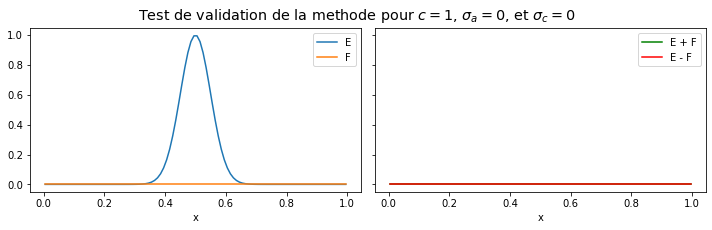

In [375]:
index = 0     # Testons la methode en ce point

x = np.array(df_s.loc[index, 'x'])
y1 = np.array(df_s.loc[index, 'E_init'])
y2 = np.array(df_s.loc[index, 'F_init'])
y3 = np.array(df_s.loc[index, 'E_final'])
y4 = np.array(df_s.loc[index, 'F_final'])

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
ax[0].plot(x,y1, label="E")
ax[0].plot(x,y2, label="F")
ax[0].set_xlabel('x')
ax[0].legend()

ax[1].plot(x,y3+y4,"g-", label="E + F")
ax[1].plot(x,y3-y4, "r-", label="E - F")
ax[1].set_xlabel('x')
ax[1].legend()

c = df_s.loc[index, 'c']
sigma_a = df_s.loc[index, 'sigma_a_expr']
sigma_c = df_s.loc[index, 'sigma_c_expr']
title = "Test de validation de la methode"
title += r' pour $c=$'+str(c)+', $\sigma_a=$'+str(int(sigma_a))+', et $\sigma_c=$'+str(int(sigma_c))

plt.suptitle(title, fontsize="x-large", y=1.05)
plt.tight_layout()

Pour $\sigma_a= \sigma_c= 0$, on observe bien un transport du signal $E+F$ a la vitesse $c=1$ et un transport de $E-F$ a la vitesse $-c$.

## Fonctions utilitaires

In [376]:
""" plot pour une ligne les signaux y """

def plot_signal(ax, df, index, x, y):
  abscissa = np.array(df.loc[index, x])

  nbplots = len(y)
  ordinate = np.empty((nbplots, len(abscissa)))

  for j in range(nbplots):
    ordinate[j] = np.array(df.loc[index, y[j]])
    ax.plot(abscissa, ordinate[j], label=y[j])
    ax.legend(shadow=True, fontsize='medium')

In [377]:
""" plot plusieurs lignes de la dataframe signaux par groupes """

def plot_group(df, figsize, index, x, groups, title=None):
  nrows = len(index)
  ncols = len(groups)
  fig, ax = plt.subplots(nrows, ncols, figsize=figsize, sharex=True, sharey=True)

  for i in range(nrows):
    for j in range(ncols):
      if nrows == 1:                    # on plot une seule ligne de la dataframe -- Probleme d'indexation Matplotlib!
        local_ax = ax[j]
      elif ncols == 1:                  # on plot une seule catagorie de signaux pour plusieurs lignes
        local_ax = ax[i]
      elif nrows == 1 and ncols == 1:   # une seule ligne pour un seul groupe de signaux
        local_ax = ax
      else:                             # plot multiple ligne multipe groups
        local_ax = ax[i, j]
      
      # local_ax.set_ylim([-1.05, 1.05])
      local_ax.set_title(r'$\rho=$'+str(df.loc[index[i], 'rho_expr'])+',    $\sigma_a=$'+str(df.loc[index[i], 'sigma_a_expr'])+',    $\sigma_c=$'+str(df.loc[index[i], 'sigma_c_expr']))
      if i == nrows-1: 
        local_ax.set_xlabel(x)
      
      plot_signal(local_ax, df, index[i], x, groups[j])
  
  if title != None:
    plt.suptitle(title, fontsize='x-large', y=1.05)
  plt.tight_layout()


In [378]:
""" Quelque groupes et abcisses interressants a visualiser"""

""" Abcisses spatialle """
x = 'x'

""" Visu spatiale 1 """
init = ['E_init', 'F_init', 'T_init']
final = ['E_final', 'F_final', 'T_final']
group_1 = [init, final]

""" Visu spatiale 2 """
E = ['E_init', 'E_final']
F = ['F_init', 'F_final']
T = ['T_init', 'T_final']
group_2 = [E, F, T]


""" Abcisses temporelle """
t = 't'

""" Visu temporelle 1 """
left = ['E_left', 'F_left', 'T_left']
right = ['E_right', 'F_right', 'T_right']
group_3 = [left, right]

""" Visu temporelle 2 """
E_edges = ['E_left', 'E_right']
F_edges = ['F_left', 'F_right']
T_edges = ['T_left', 'T_right']
group_4 = [E_edges, F_edges, T_edges]

## Influence de la densite $\rho$

### $\sigma_a$ non nul

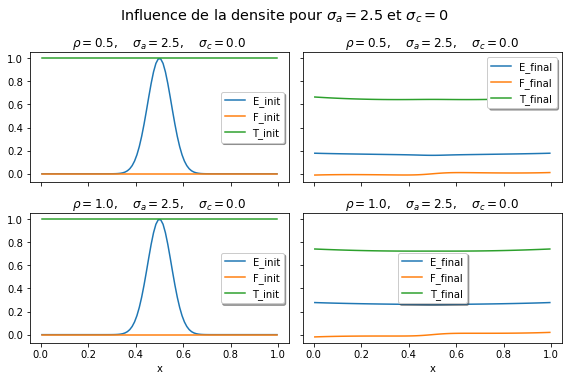

In [379]:
""" Les indices a dessiner pour cette partie """
condition = (df_s['rho_expr']==0.5) | (df_s['rho_expr']==1) | (df_s['rho_expr']==2.5) | (df_s['rho_expr']==rho_max)
condition &= (df_s['sigma_a_expr']==2.5) & (df_s['sigma_c_expr']==sigma_c_min)
index = df_s.loc[condition].index

""" Visualisation temporelle """
figsize = (8, 5)
title = r"Influence de la densite pour $\sigma_a=2.5$ et $\sigma_c=0$"

plot_group(df_s, figsize, index, x, group_1, title)

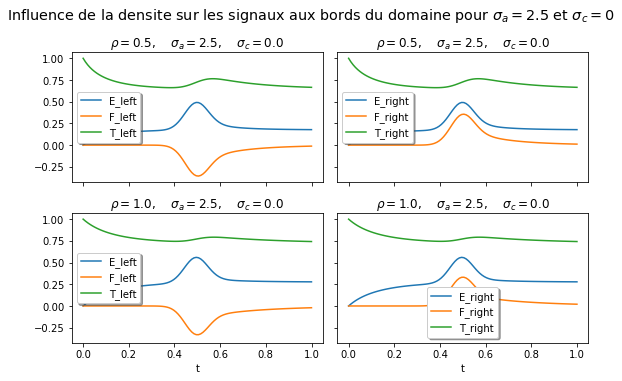

In [380]:
""" Visualisation temporelle """

figsize = (8, 5)
title = r"Influence de la densite sur les signaux aux bords du domaine pour $\sigma_a=2.5$ et $\sigma_c=0$"

plot_group(df_t, figsize, index, t, group_3, title)

Des lors que $\sigma_a$ est non nul, on constate en plus du transfer, un phenomene de diffusion due a l'obsoption des photons et leur reemission dans une direction aleatoire. Cet interaction avec le milieu se traduit par une variation de sa temperature. Il semblerait que: 
- Plus la densite est elevee, plus l'energie diffusee $E$ est importante. 
- La densite n'a aucune influence sur le flux de photons $F$ 
- Plus la densite est elevee, moins importante (ou peut-etre plus lente) est la variantion de temperature $T$ ($T$ initiale etant non nul). On dirait que la temperature d'equilibre tant a etre elevee. 


### $\sigma_a$ nul


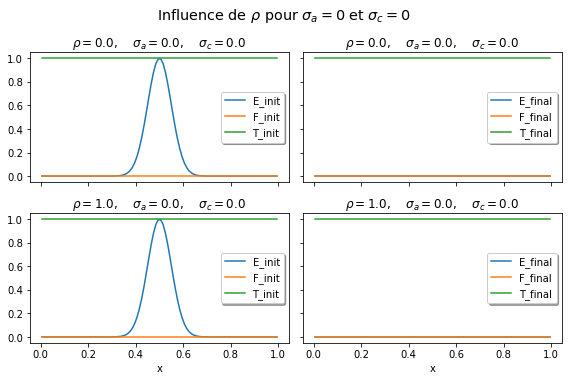

In [381]:
condition = (df_s['rho_expr']==rho_min) | (df_s['rho_expr']==rho_max)
condition &= (df_s['sigma_a_expr']==sigma_a_min) & (df_s['sigma_c_expr']==sigma_c_min)
index = df_s.loc[condition].index

figsize = (8, 5)
title = r"Influence de $\rho$ pour $\sigma_a=0$ et $\sigma_c=0$"

plot_group(df_s, figsize, index, x, group_1, title)

On constate que faire varier $\rho$ n'influence pas les resultats. $\sigma_a$ etant nul, Ce resultat s'explique par l'abscence d'interatcion avec le milieu.

## Influence de l'opacite d'absorption $\sigma_a$

### $\rho$ non nul

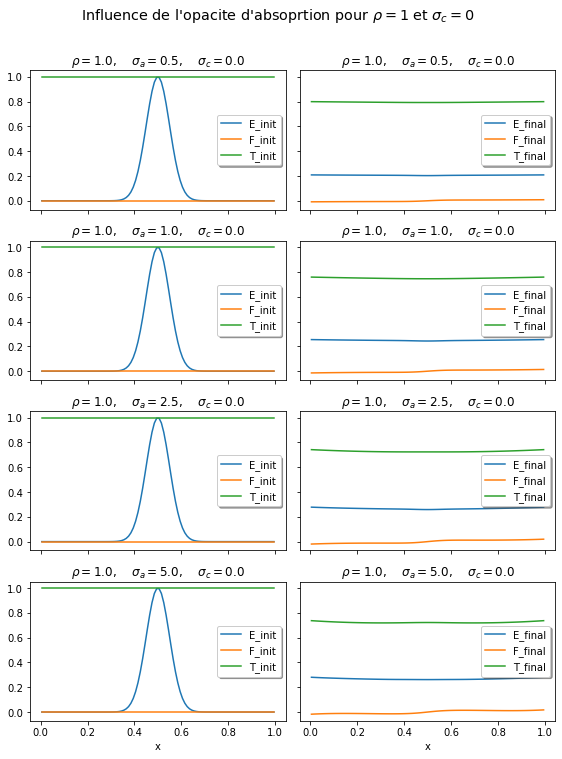

In [382]:
condition = (df_s['sigma_a_expr']==0.5) | (df_s['sigma_a_expr']==1) | (df_s['sigma_a_expr']==2.5) | (df_s['sigma_a_expr']==sigma_a_max)
condition &= (df_s['rho_expr']==1) & (df_s['sigma_c_expr']==sigma_c_min)
index = df_s.loc[condition].index

""" Visualisation spatiale """

figsize = (8, 10)
title = r"Influence de l'opacite d'absoprtion pour $\rho=1$ et $\sigma_c=0$"

plot_group(df_s, figsize, index, x, group_1, title)

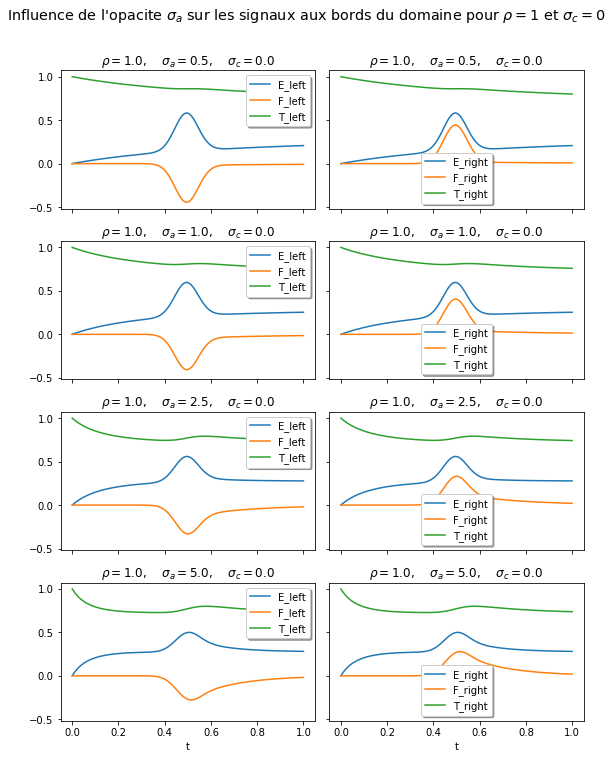

In [383]:
""" Visualisation temporelle """

figsize = (8, 10)
title = r"Influence de l'opacite $\sigma_a$ sur les signaux aux bords du domaine pour $\rho=1$ et $\sigma_c=0$"

plot_group(df_t, figsize, index, t, group_3, title)

Lorsque $\sigma_a$ est augente, il semble que:
- La diffusion de l'energie est plus rapide mais garde la meme valeur pic.
- Le flux de photons est attenue pendant le transport.
- Les variations de la temperature sont plus importantes et l'equilibre thermique est plus rapidement atteint.

### $\rho$ nul

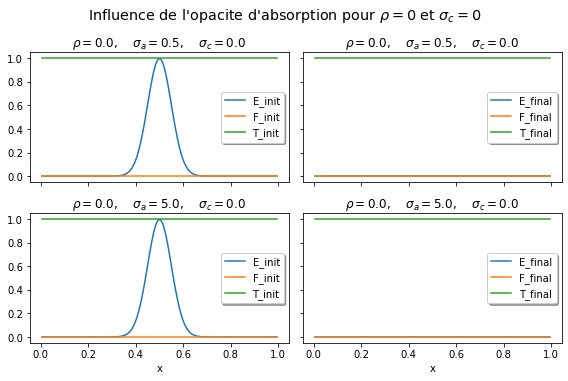

In [384]:
condition = (df_s['sigma_a_expr']==0.5)| (df_s['sigma_a_expr']==sigma_a_max)
condition &= (df_s['rho_expr']==0) & (df_s['sigma_c_expr']==0)
index = df_s.loc[condition].index

figsize = (8, 5)
title = r"Influence de l'opacite d'absorption pour $\rho=0$ et $\sigma_c=0$"

plot_group(df_s, figsize, index, x, group_1, title)

pour $\rho$ nul, on n'observe aucun changement par rapport a $\sigma_a$. 

## Influence de l'opacite de diffusion $\sigma_c$

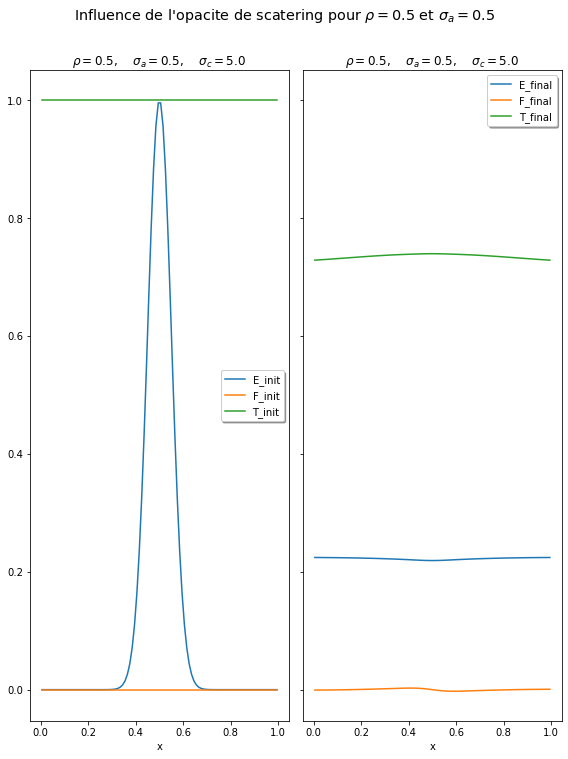

In [385]:
condition = (df_s['sigma_c_expr']==0.5) | (df_s['sigma_c_expr']==1) | (df_s['sigma_c_expr']==2.5) | (df_s['sigma_c_expr']==sigma_a_max)
condition &= (df_s['rho_expr']==0.5) & (df_s['sigma_a_expr']==0.5)
index = df_s.loc[condition].index

figsize = (8, 10)
title = r"Influence de l'opacite de scatering pour $\rho=0.5$ et $\sigma_a=0.5$"

plot_group(df_s, figsize, index, x, group_1, title)

L'opacite de scatering $\sigma_c$ contribue a ettenuer les signaux $E$, $F$. EN effet, la diffusion du signal dans le milieu entraine la diminution de son intensite. L'influence sur $T$ est moins perceptible.

# SYNTHESE
Il remarque que pour les signaux finaux ne depanssent jamais la valeur maximale de depart 1, meme lorsqu'il n'ya aycune absoption ni dissusion ($\sigma_a = \sigma_c = 0$). Ce qui est probablement du au coupalge avec la metiere.


En conlusion l'augmentation de la densite et des opacites a tendance a intensifier le phenomene de diffusion dans le milieu. 